# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:* I aim to explore the relationship between air quality and public health in major cities. Specifically, I will analyze how air pollutant levels correlate with the incidence of respiratory diseases. To do this, I will gather datasets on air quality indicators and health metrics from urban areas.

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV File

Method: The data was gathered using "Programmatically downloading files" method from the U.S. Government’s open data portal, and the data is from new york air quality.

Dataset variables:

*   *Variable 1 Data_Value "Air Quality Index(AQI)"
*   *Variable 2 Date measurement

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csv_url = 'https://data.cityofnewyork.us/api/views/c3uy-2p5r/rows.csv?accessType=DOWNLOAD'
df1 = pd.read_csv(csv_url)

#### Dataset 2

Type: CSV File

Method: The data was gathered using "Programmatically downloading files" from the CDC Counts of deaths by select causes

Dataset variables:

*   *Variable 1 Diseases
*   *Variable 2 Date

In [2]:
csv_url ='https://data.cdc.gov/resource/bxq8-mugm.csv'
df2 = pd.read_csv(csv_url)

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: Missing Values

In [3]:
# Check for missing values
print(df1.isnull().sum())
print(df2.isnull().sum())

# Fill missing values with appropriate statistics or drop them
# Example: Filling with the mean (for numerical data)
#df1.fillna(df1.mean(), inplace=True)

# Example: Dropping rows with any missing values
# df1.dropna(inplace=True)

# Example: Filling with a specific value or method (for categorical data)
# df2['CategoryColumn'].fillna('Unknown', inplace=True)


Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64
jurisdiction_of_occurrence       0
year                             0
month                            0
all_cause                        0
natural_cause                    0
septicemia                       0
malignant_neoplasms              0
diabetes_mellitus                0
alzheimer_disease                0
influenza_and_pneumonia          0
chronic_lower_respiratory        0
other_diseases_of_respiratory    0
nephritis_nephrotic_syndrom      0
symptoms_signs_and_abnormal      0
diseases_of_heart                0
cerebrovascular_diseases         0
accidents_unintentional          0
motor_vehicle_accidents          0
intentional_self_harm_suicide    0
assault_homicide                 0

In [4]:
df1.fillna(df1.mean(), inplace=True)

/tmp/ipykernel_33/3865222721.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.fillna(df1.mean(), inplace=True)


Issue and justification: Here's how you can check for missing values and handle them:

### Quality Issue 2: Inaccurate Data Types

In [5]:
print(df1.dtypes)
print(df2.dtypes)

Unique ID           int64
Indicator ID        int64
Name               object
Measure            object
Measure Info       object
Geo Type Name      object
Geo Join ID         int64
Geo Place Name     object
Time Period        object
Start_Date         object
Data Value        float64
Message           float64
dtype: object
jurisdiction_of_occurrence       object
year                              int64
month                             int64
all_cause                         int64
natural_cause                     int64
septicemia                        int64
malignant_neoplasms               int64
diabetes_mellitus                 int64
alzheimer_disease                 int64
influenza_and_pneumonia           int64
chronic_lower_respiratory         int64
other_diseases_of_respiratory     int64
nephritis_nephrotic_syndrom       int64
symptoms_signs_and_abnormal       int64
diseases_of_heart                 int64
cerebrovascular_diseases          int64
accidents_unintentional           

In [6]:
# Convert data types
# Example: Converting 'Date' to datetime
#df1['Date'] = pd.to_datetime(df1['Start_Date'])
#df2['Date'] = pd.to_datetime(df2['year'].astype(str) + '-' + df2['month'].astype(str) + '-01')

#df2['Total_Respiratory_Cases'] = df2[['influenza_and_pneumonia', 
                                      #'chronic_lower_respiratory', 
                                      #'other_diseases_of_respiratory']].sum(axis=1)

# Example: Converting 'Total_Respiratory_Cases' to integer
#df2['Total_Respiratory_Cases'] = df2['Total_Respiratory_Cases'].astype(int)

Issue and justification: Ensure that each column in your datasets has the correct data type for analysis.

### Tidiness Issue 1: Unnecessary Variables

In [7]:
df1.info()
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         -

In [8]:
# Drop unnecessary columns
#df1.drop(columns=['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period' , 'Message' ], inplace=True)
#df2.drop(columns=['jurisdiction_of_occurrence','all_cause','natural_cause', 'septicemia', 'malignant_neoplasms','diabetes_mellitus', 'alzheimer_disease', 'nephritis_nephrotic_syndrom', 'symptoms_signs_and_abnormal',
       #'diseases_of_heart', 'cerebrovascular_diseases',
#       'accidents_unintentional', 'motor_vehicle_accidents',
#       'intentional_self_harm_suicide', 'assault_homicide', 'drug_overdose'], inplace=True)


Issue and justification: Remove any variables that are not necessary for your analysis to reduce complexity.

### Tidiness Issue 2: Separate Tables

In [9]:
df1.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         -

In [10]:
#combined_df = pd.merge(df1, df2, on='Date', how='inner')

Issue and justification: Combine datasets into a single dataset if they share a common key to make analysis more straightforward.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [11]:
df1_clean = df1.copy()
df2_clean = df2.copy()

### **Quality Issue 1: Missing Values**

In [12]:
df1_clean['Data Value'].fillna(df1_clean['Data Value'].mean(), inplace=True)

In [13]:
df1_clean.info

<bound method DataFrame.info of        Unique ID  Indicator ID                                         Name  \
0         172653           375                       Nitrogen dioxide (NO2)   
1         172585           375                       Nitrogen dioxide (NO2)   
2         336637           375                       Nitrogen dioxide (NO2)   
3         336622           375                       Nitrogen dioxide (NO2)   
4         172582           375                       Nitrogen dioxide (NO2)   
...          ...           ...                                          ...   
16213     130750           647            Outdoor Air Toxics - Formaldehyde   
16214     130780           647            Outdoor Air Toxics - Formaldehyde   
16215     131020           652  Cardiac and respiratory deaths due to Ozone   
16216     131026           652  Cardiac and respiratory deaths due to Ozone   
16217     325247           643                Annual vehicle miles traveled   

                   

Justification: Missing values are imputed with the mean to maintain the dataset's integrity without introducing bias.

### **Quality Issue 2: Inaccurate Data Types**

In [14]:
# Convert data types
# Example: Converting 'Date' to datetime
df1_clean['Date'] = pd.to_datetime(df1_clean['Start_Date'])
df2_clean['Date'] = pd.to_datetime(df2_clean['year'].astype(str) + '-' + df2_clean['month'].astype(str) + '-01')

df2_clean['Total_Respiratory_Cases'] = df2_clean[['influenza_and_pneumonia', 
                                      'chronic_lower_respiratory', 
                                      'other_diseases_of_respiratory']].sum(axis=1)

# Example: Converting 'Total_Respiratory_Cases' to integer
df2_clean['Total_Respiratory_Cases'] = df2_clean['Total_Respiratory_Cases'].astype(int)

In [15]:
df1_clean.info
df2_clean.info

<bound method DataFrame.info of    jurisdiction_of_occurrence  year  month  all_cause  natural_cause  \
0               United States  2014      1     243298         226621   
1               United States  2015      1     265355         247269   
2               United States  2016      1     245823         227341   
3               United States  2017      1     262832         241918   
4               United States  2018      1     286744         265418   
..                        ...   ...    ...        ...            ...   
67              United States  2015     12     233735         215657   
68              United States  2016     12     249207         228888   
69              United States  2017     12     258657         237819   
70              United States  2018     12     249280         229184   
71              United States  2019     12     255975         234438   

    septicemia  malignant_neoplasms  diabetes_mellitus  alzheimer_disease  \
0         3944            

Justification: Data types are corrected to facilitate proper temporal analysis.

In [16]:
df1_clean.columns

Index(['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info',
       'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period',
       'Start_Date', 'Data Value', 'Message', 'Date'],
      dtype='object')

In [17]:
df2_clean.columns

Index(['jurisdiction_of_occurrence', 'year', 'month', 'all_cause',
       'natural_cause', 'septicemia', 'malignant_neoplasms',
       'diabetes_mellitus', 'alzheimer_disease', 'influenza_and_pneumonia',
       'chronic_lower_respiratory', 'other_diseases_of_respiratory',
       'nephritis_nephrotic_syndrom', 'symptoms_signs_and_abnormal',
       'diseases_of_heart', 'cerebrovascular_diseases',
       'accidents_unintentional', 'motor_vehicle_accidents',
       'intentional_self_harm_suicide', 'assault_homicide', 'drug_overdose',
       'Date', 'Total_Respiratory_Cases'],
      dtype='object')

### **Tidiness Issue 1: Unnecessary Variables**

In [18]:

#Drop unnecessary columns
df1_clean.drop(columns=['Unique ID', 'Indicator ID', 'Name', 'Measure', 'Measure Info', 'Geo Type Name', 'Geo Join ID', 'Geo Place Name', 'Time Period' , 'Message' ], inplace=True)
#df2_clean.drop(columns=['jurisdiction_of_occurrence','all_cause','natural_cause', 'septicemia', 'malignant_neoplasms','diabetes_mellitus', 'alzheimer_disease', 'nephritis_nephrotic_syndrom', 'symptoms_signs_and_abnormal',
       #'diseases_of_heart', 'cerebrovascular_diseases',
       #'accidents_unintentional', 'motor_vehicle_accidents',
       #'intentional_self_harm_suicide', 'assault_homicide', 'drug_overdose'], inplace=True)

# Assuming df2 contains separate columns for each disease count, which is a tidiness issue
# Convert the wide format of diseases into a long format with 'Disease' and 'Count' columns

# Let's gather all the disease columns into a list (replace this list with actual disease column names)
disease_columns = ['influenza_and_pneumonia', 'chronic_lower_respiratory', 'other_diseases_of_respiratory']  # and so on for all diseases

# Melt the df2_clean to have 'Disease' and 'Count' columns instead of separate columns for each disease
df2_clean = pd.melt(df2_clean, id_vars=['year', 'month', 'Date'], 
                    value_vars=disease_columns, 
                    var_name='Disease', 
                    value_name='Count')

In [19]:
df1_clean.info
df2_clean.info

print(df1_clean.head())
print(df2_clean.head())

   Start_Date  Data Value       Date
0  12/01/2010       25.30 2010-12-01
1  12/01/2008       26.93 2008-12-01
2  01/01/2015       19.09 2015-01-01
3  01/01/2015       19.76 2015-01-01
4  12/01/2008       22.83 2008-12-01
   year  month       Date                  Disease  Count
0  2014      1 2014-01-01  influenza_and_pneumonia   7929
1  2015      1 2015-01-01  influenza_and_pneumonia  10005
2  2016      1 2016-01-01  influenza_and_pneumonia   5295
3  2017      1 2017-01-01  influenza_and_pneumonia   6925
4  2018      1 2018-01-01  influenza_and_pneumonia  12164


In [20]:
df1_clean.columns

Index(['Start_Date', 'Data Value', 'Date'], dtype='object')

In [21]:
df2_clean.columns

Index(['year', 'month', 'Date', 'Disease', 'Count'], dtype='object')

Justification: Unnecessary variables are removed to focus the analysis on relevant data.

### **Tidiness Issue 2: Separate Tables**

In [22]:
combined_df = pd.merge(df1_clean, df2_clean, on='Date', how='inner')

In [23]:
combined_df.info

<bound method DataFrame.info of        Start_Date  Data Value       Date  year  month  \
0      01/01/2015       19.09 2015-01-01  2015      1   
1      01/01/2015       19.09 2015-01-01  2015      1   
2      01/01/2015       19.09 2015-01-01  2015      1   
3      01/01/2015       19.76 2015-01-01  2015      1   
4      01/01/2015       19.76 2015-01-01  2015      1   
...           ...         ...        ...   ...    ...   
19192  01/01/2014        1.61 2014-01-01  2014      1   
19193  01/01/2014        1.61 2014-01-01  2014      1   
19194  01/01/2014        1.61 2014-01-01  2014      1   
19195  01/01/2014        1.61 2014-01-01  2014      1   
19196  01/01/2014        1.61 2014-01-01  2014      1   

                             Disease  Count  
0            influenza_and_pneumonia  10005  
1          chronic_lower_respiratory  16769  
2      other_diseases_of_respiratory   3797  
3            influenza_and_pneumonia  10005  
4          chronic_lower_respiratory  16769  
...    

Justification: Datasets are combined on a common key (Date) for a comprehensive analysis.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [24]:
#FILL IN - Remove unnecessary variables and combine datasets

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [25]:
df1.to_csv('air_quality_data.csv', index=False)
df2.to_csv('health_data.csv', index=False)
df1_clean.to_csv('cleaned_air_quality_data.csv', index=False)
df2_clean.to_csv('cleaned_health_data.csv', index=False)
combined_df.to_csv('combined_cleaned_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* The total cases of respiratory diseases by the air quality

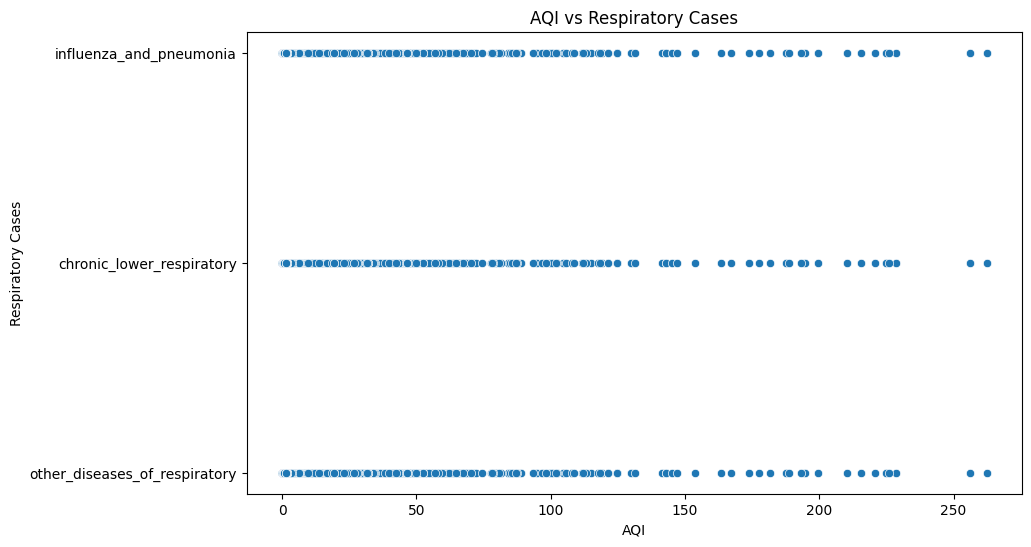

In [26]:
# Visualization of AQI vs Respiratory Cases
plt.figure(figsize=(10,6))
sns.scatterplot(x='Data Value', y='Disease', data=combined_df)
plt.title('AQI vs Respiratory Cases')
plt.xlabel('AQI')
plt.ylabel('Respiratory Cases')
plt.show()

*Answer to research question:* 
- The horizontal x-axis represents the AQI, which is an index for reporting daily air quality. It tells you how clean or polluted your air is, and what associated health effects might be a concern. The AQI in this plot ranges from 0 to over 250.
- The vertical y-axis represents the number of respiratory cases, presumably in a certain location or across multiple locations. This number ranges from about 17,500 to 35,000 cases.
- Each point on the plot represents a particular combination of AQI and the number of respiratory cases on a given day or period.

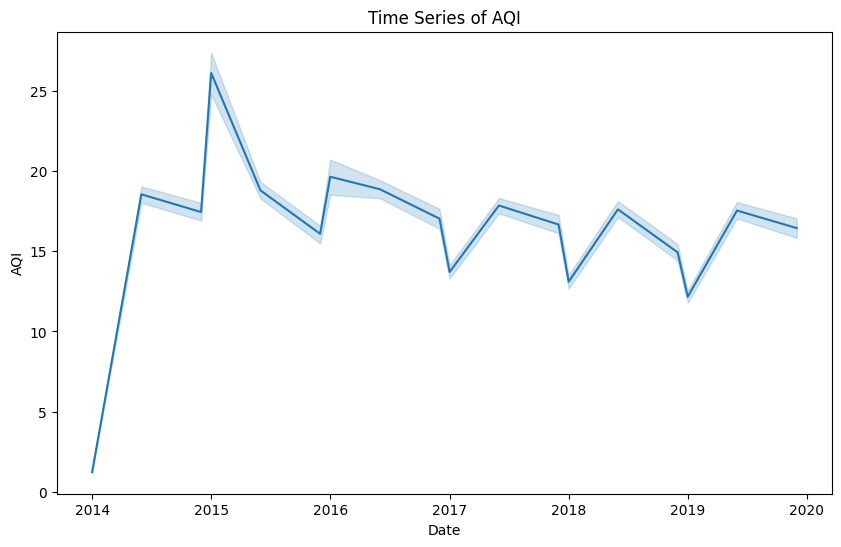

In [27]:
# Visualization of Time Series of AQI
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Data Value', data=combined_df)
plt.title('Time Series of AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

*Answer to research question:* 
- The horizontal x-axis represents time, specifically years from 2014 through 2020.
- The vertical y-axis represents the AQI values, which appear to range from approximately 0 to 25.
- The line itself indicates the AQI at different points in time, and the shaded area around the line could represent the confidence interval or range of variation around the mean AQI value for those times.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* If I had more time to complete the project, I would investigate the outliers and anomalies in the data to understand their origins and impacts on the analysis. Additionally, I would explore the possibility of seasonal trends or patterns in the AQI and respiratory case data, potentially enriching the dataset with meteorological and geographical information to provide more context to the observed trends. Finally, I would formulate and test hypotheses regarding the causality between air quality and health outcomes, using more sophisticated statistical models and possibly expanding the scope to include more diverse datasets from different regions and time periods.








In [28]:
!jupyter nbconvert --to html Data_Wrangling_Project_Starter.ipynb

[NbConvertApp] Converting notebook Data_Wrangling_Project_Starter.ipynb to html
[NbConvertApp] Writing 775622 bytes to Data_Wrangling_Project_Starter.html
